## Question 4


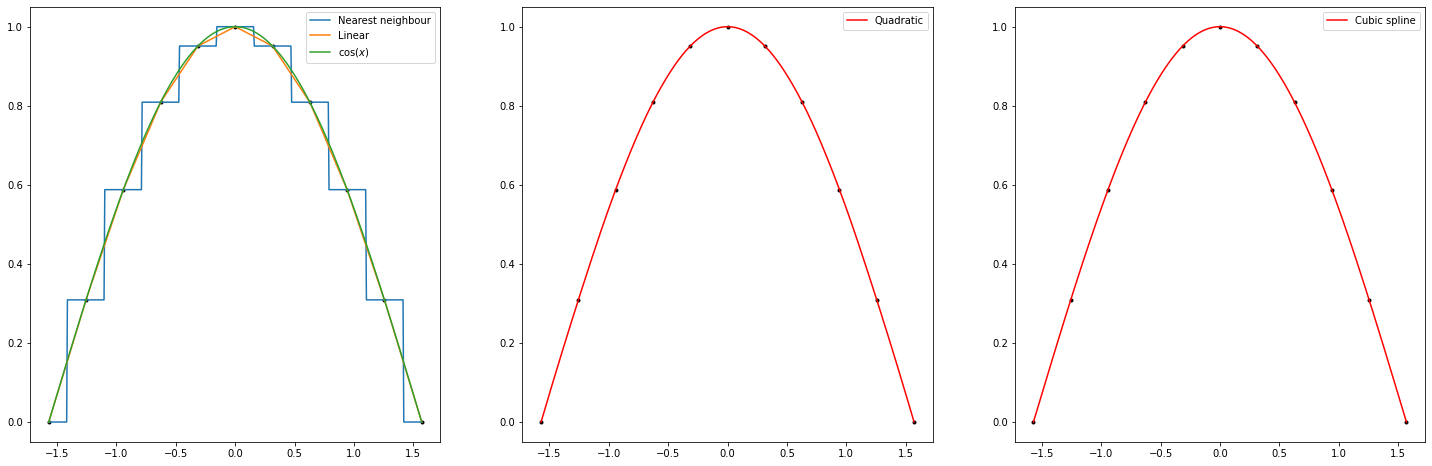

The root mean square error on the nearest neighbour interpolation is: 0.0639339392182442
The root mean square error on linear interpolation is: 0.006350728317241847
The root mean square error on the quadratic interpolation is: 0.00046929553987613945
The root mean square error on the cubic spline is 3.140124235578087e-05


In [3]:
# Question 4
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# scipy interpolation for cosine between -pi/2 and pi/2

x = np.linspace(-np.pi/2, np.pi/2, 11)
y = np.cos(x)
x_fine = np.linspace(-np.pi/2, np.pi/2, 500)

# Nearest neighbours
nearest = interpolate.interp1d(x, y, kind = 'nearest')
rmse_nearest = np.sqrt(np.mean((np.cos(x_fine) - nearest(x_fine))**2))

# Linear interpolation
linear = interpolate.interp1d(x, y, kind = 'linear')
rmse_linear = np.sqrt(np.mean((np.cos(x_fine) - linear(x_fine))**2))

# Quadratic interpolation
quadratic = interpolate.interp1d(x, y, kind = 'quadratic')
rmse_quadratic = np.sqrt(np.mean((np.cos(x_fine) - quadratic(x_fine))**2))

# Cubic spline 
cubic = interpolate.interp1d(x, y, kind = 'cubic')
rmse_cubic = np.sqrt(np.mean((np.cos(x_fine) - cubic(x_fine))**2))


fig, ax = plt.subplots(1,3,figsize=(25,8))
ax[0].plot(x,y,'k.')
ax[0].plot(x_fine,nearest(x_fine), label = 'Nearest neighbour')
ax[0].plot(x_fine,linear(x_fine), label = 'Linear')
ax[0].plot(x_fine, np.cos(x_fine), label = '$\cos(x)$')
ax[0].legend(loc ='best')


ax[1].plot(x,y,'k.')
ax[1].plot(x_fine,quadratic(x_fine), 'r', label = 'Quadratic')
ax[1].legend(loc ='best')

ax[2].plot(x,y,'k.')
ax[2].plot(x_fine,cubic(x_fine), 'r', label = 'Cubic spline')
ax[2].legend(loc ='best')
plt.show()


print("The root mean square error on the nearest neighbour interpolation is:", rmse_nearest)
print("The root mean square error on linear interpolation is:", rmse_linear)
print("The root mean square error on the quadratic interpolation is:", rmse_quadratic)
print("The root mean square error on the cubic spline is", rmse_cubic)

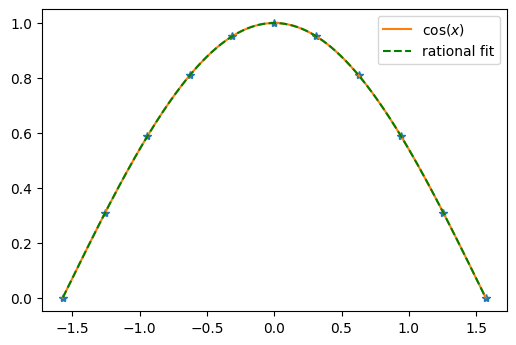

The root mean squared error on the rational interpolation is: 3.3758978990759764e-09


In [139]:
# Code for rational interpolation (taken from class)

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

# Rat fit for cosine bewteen -pi/2 and pi/2
n=5
m=7
x=np.linspace(-np.pi/2,np.pi/2,n+m-1)
y=np.cos(x)
p,q=rat_fit(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=np.cos(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = '$\cos(x)$')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.legend()
plt.show()


rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)


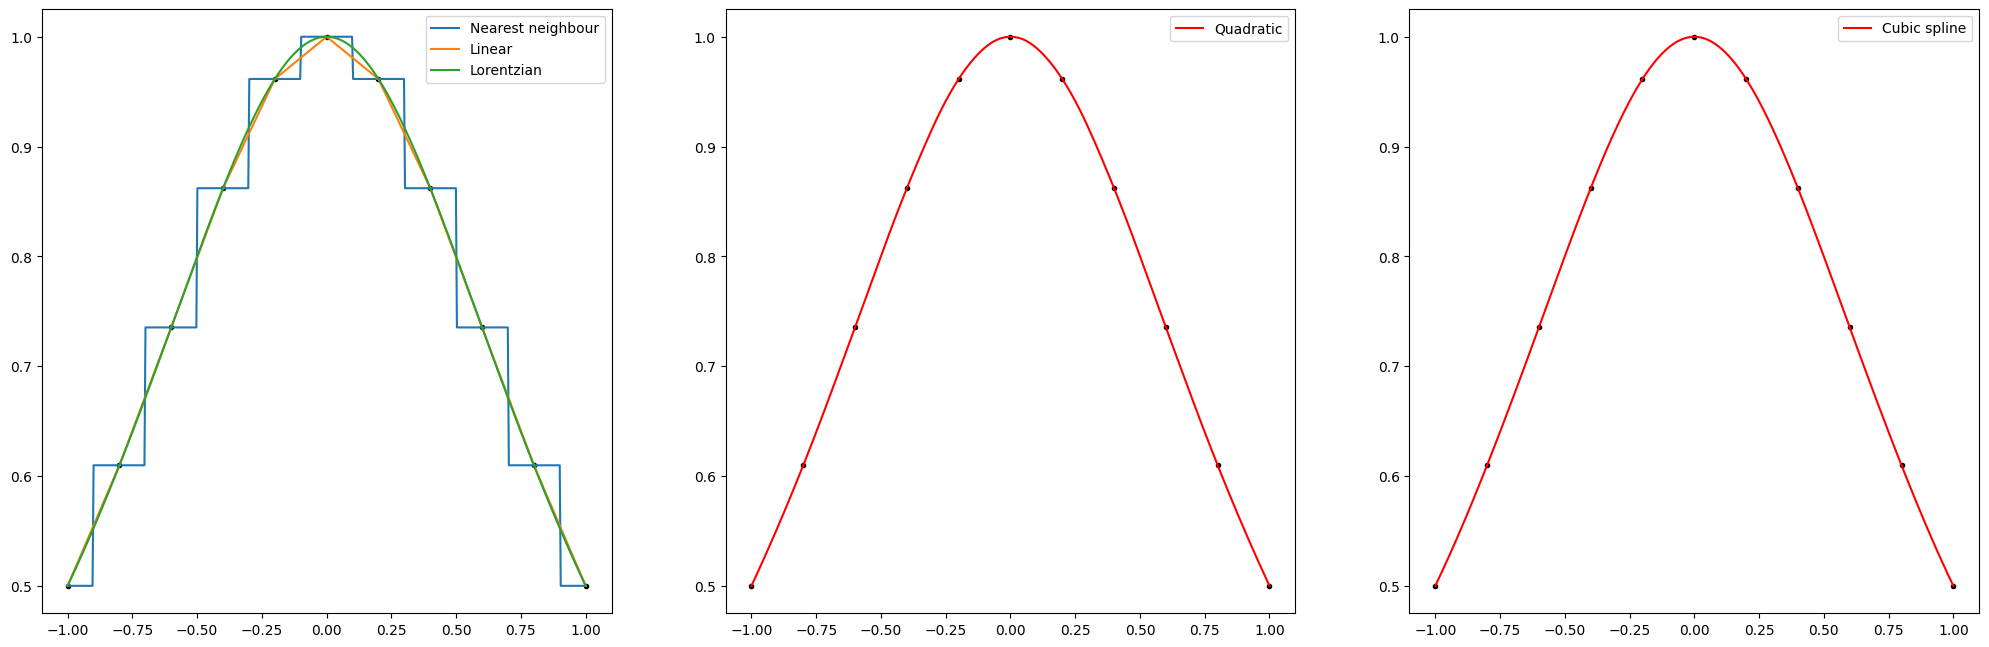

The root mean square error on the nearest neighbour interpolation is: 0.030464270246018672
The root mean square error on linear interpolation is: 0.0036913982724037374
The root mean square error on the quadratic interpolation is: 0.00018091510510278392
The root mean square error on the cubic spline is 0.00011125141313629842


In [130]:
# Scipy interpolation for a lorentzian between -1 and 1

x = np.linspace(-1, 1, 11)

def lorentzian(x):
    return 1/(1+x**2)

y = lorentzian(x)
x_fine = np.linspace(-1, 1, 500)

# Nearest neighbours
nearest = interpolate.interp1d(x, y, kind = 'nearest')
rmse_nearest = np.sqrt(np.mean((lorentzian(x_fine) - nearest(x_fine))**2))

# Linear interpolation
linear = interpolate.interp1d(x, y, kind = 'linear')
rmse_linear = np.sqrt(np.mean((lorentzian(x_fine) - linear(x_fine))**2))

# Quadratic interpolation
quadratic = interpolate.interp1d(x, y, kind = 'quadratic')
rmse_quadratic = np.sqrt(np.mean((lorentzian(x_fine) - quadratic(x_fine))**2))

# Cubic spline 
cubic = interpolate.interp1d(x, y, kind = 'cubic')
rmse_cubic = np.sqrt(np.mean((lorentzian(x_fine) - cubic(x_fine))**2))

fig, ax = plt.subplots(1,3,figsize=(25,8))
ax[0].plot(x,y,'k.')
ax[0].plot(x_fine,nearest(x_fine), label = 'Nearest neighbour')
ax[0].plot(x_fine,linear(x_fine), label = 'Linear')
ax[0].plot(x_fine, lorentzian(x_fine), label = 'Lorentzian')
ax[0].legend(loc ='best')


ax[1].plot(x,y,'k.')
ax[1].plot(x_fine,quadratic(x_fine), 'r', label = 'Quadratic')
ax[1].legend(loc ='best')

ax[2].plot(x,y,'k.')
ax[2].plot(x_fine,cubic(x_fine), 'r', label = 'Cubic spline')
ax[2].legend(loc ='best')
plt.show()

print("The root mean square error on the nearest neighbour interpolation is:", rmse_nearest)
print("The root mean square error on linear interpolation is:", rmse_linear)
print("The root mean square error on the quadratic interpolation is:", rmse_quadratic)
print("The root mean square error on the cubic spline is", rmse_cubic)

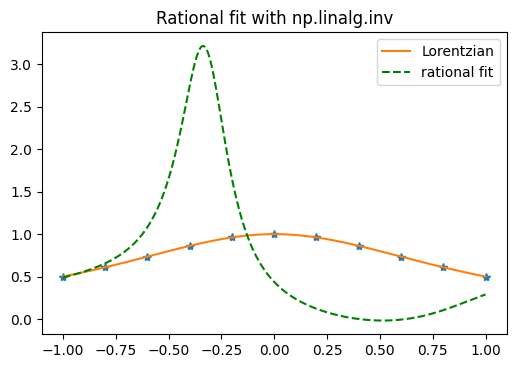

The root mean squared error on the rational interpolation is: 0.8500774166773788
Wow that is really not good!


In [131]:
# rational function fit on the lorentzian

n=5
m=7
x=np.linspace(-1,1,n+m-1)
y=lorentzian(x)
p,q=rat_fit(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=lorentzian(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = 'Lorentzian')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.title('Rational fit with np.linalg.inv')
plt.legend()
plt.show()

p_inv = p
q_inv = q

rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)
print('Wow that is really not good!')

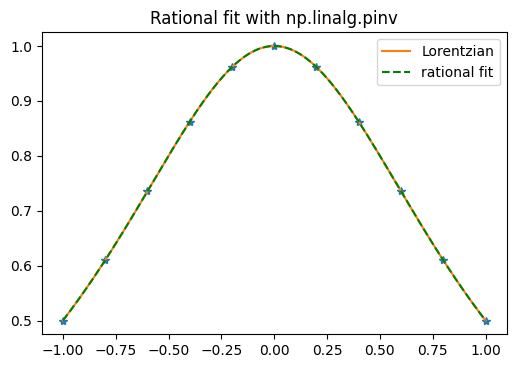

The root mean squared error on the rational interpolation is: 4.134146169365445e-16
This much better! Lets look at p and q to try and figure out what changed.
p and q obtained from np.linalg.inv: [ 0.43701074 -0.75       -1.         -2.          6.        ] [ 4.25  4.   -4.    2.   -4.    6.  ]
p and q obtained from np.linalg.pinv: [ 1.00000000e+00  0.00000000e+00 -3.75000000e-01 -4.30211422e-16
  1.25000000e-01] [ 4.4408921e-16  6.2500000e-01  4.4408921e-16 -2.5000000e-01
  4.4408921e-16  1.2500000e-01]


In [137]:
# Let's try using np.linalag.pinv in the rational fit 

def rat_fit_new(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

n=5
m=7
x=np.linspace(-1,1,n+m-1)
y=lorentzian(x)
p,q=rat_fit_new(x,y,n,m)
xx=np.linspace(x[0],x[-1],500)
y_true=lorentzian(xx)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true, label = 'Lorentzian')
plt.plot(xx,pred, 'g--', label = 'rational fit')
plt.title('Rational fit with np.linalg.pinv')
plt.legend()
plt.show()

p_pinv = p
q_pinv = q

rmse_rat = np.sqrt(np.mean((y_true - pred)**2))
print("The root mean squared error on the rational interpolation is:", rmse_rat)
print('This much better! Lets look at p and q to try and figure out what changed.')
print('p and q obtained from np.linalg.inv:', p_inv, q_inv)
print('p and q obtained from np.linalg.pinv:', p_pinv, q_pinv)

There's an enormous difference between the $p$'s and $q$'s obtained using np.linalg.inv (inv) and np.linalg.pinv (pinv). Most of the entries obtained from inv are greater than 1, which is not normal, while the entries obtained from pinv are all less than 1, with most of them being zero. This is probably because the matrix in that case is singular (determinant is zero or close to zero), and np.linalg.pinv is able to handle that.